In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


In [2]:
df = pd.read_excel("EV.xlsx")

In [3]:
df.head()

,Year,Month,modelDesc,colour,vehicleClass,makerName,OfficeCd
0,2019,January,SWEEKAR L,ADAPT GREEN,eCart,ADAPT MOTORS PVT.LTD,RTA MANCHERIAL
1,2019,January,SWEEKAR,ADAPT GREEN,eRickshaw,ADAPT MOTORS PVT.LTD,RTA NAGARKURNOOL
2,2019,January,RIDGE+ BOV,MEGNA GREY,MOTOR CYCLE,M/S OKINAWA AUTOTECH PVT LTD,RTA RANGAREDDY
3,2019,January,SWEEKAR L,ADAPT GREEN,eCart,ADAPT MOTORS PVT.LTD,RTA MANCHERIAL
4,2019,January,RIDGE+ BOV,MEGNA GREY,MOTOR CYCLE,M/S OKINAWA AUTOTECH PVT LTD,RTA RANGAREDDY


In [4]:
month_map = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4,
    'May': 5, 'June': 6, 'July': 7, 'August': 8,
    'September': 9, 'October': 10, 'November': 11, 'December': 12
}

In [5]:
df['Month_Num'] = df['Month'].map(month_map)

    month_num month_name  total_registrations
0           1        Jan                24211
1           2        Feb                21528
2           3        Mar                32758
3           4        Apr                24024
4           5        May                26045
5           6        Jun                26140
6           7        Jul                19325
7           8        Aug                23354
8           9        Sep                13921
9          10        Oct                22143
10         11        Nov                18638
11         12        Dec                18563


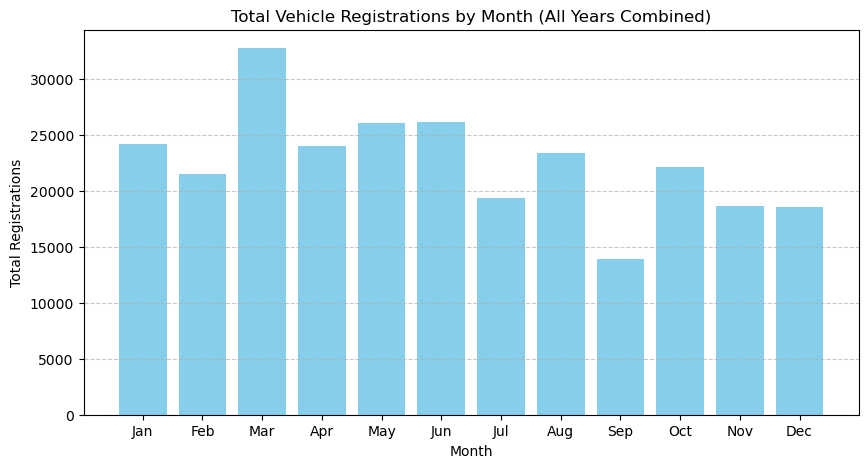

In [24]:

df['date'] = pd.to_datetime(df['date'])


df['month_num'] = df['date'].dt.month
df['month_name'] = df['date'].dt.strftime('%b')


monthly_totals = (
    df.groupby(['month_num', 'month_name'])
    .size()
    .reset_index(name='total_registrations')
    .sort_values('month_num')
)

print(monthly_totals)


plt.figure(figsize=(10,5))
plt.bar(monthly_totals['month_name'], monthly_totals['total_registrations'], color='skyblue')
plt.title('Total Vehicle Registrations by Month (All Years Combined)')
plt.xlabel('Month')
plt.ylabel('Total Registrations')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [6]:
df_grouped = df.groupby(['Year', 'Month_Num', 'makerName']) \
               .size().reset_index(name='Sales')

In [7]:
df_grouped.sort_values(by=['makerName', 'Year', 'Month_Num'], inplace=True)
df_grouped['Sales_lag_1'] = df_grouped.groupby('makerName')['Sales'].shift(1)

In [8]:
df_grouped.dropna(inplace=True)

In [9]:
le = LabelEncoder()
df_grouped['makerName_encoded'] = le.fit_transform(df_grouped['makerName'])

In [10]:
X = df_grouped[['Year', 'Month_Num', 'makerName_encoded', 'Sales_lag_1']]
y = df_grouped['Sales']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [12]:
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [13]:
y_pred = model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

C:\Users\PRATIK\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


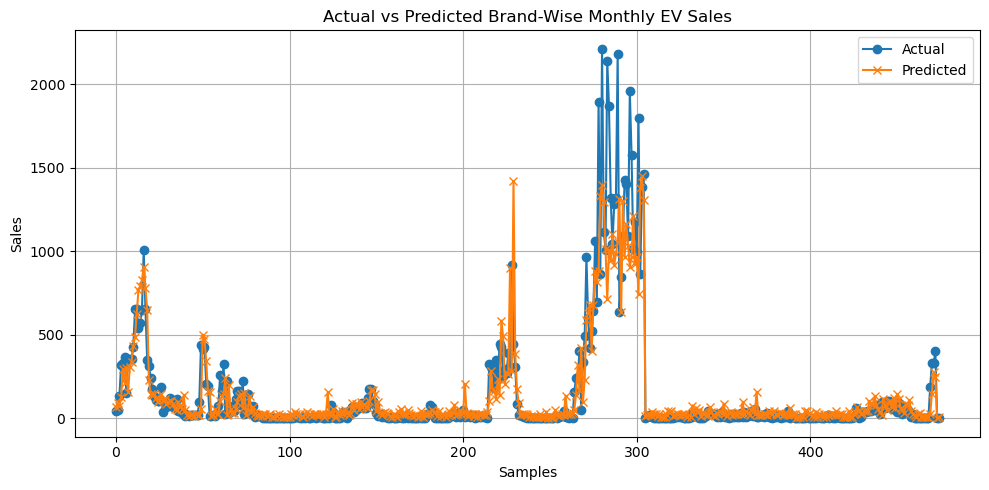

In [14]:
plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label='Actual', marker='o')
plt.plot(y_pred, label='Predicted', marker='x')
plt.title("Actual vs Predicted Brand-Wise Monthly EV Sales")
plt.xlabel("Samples")
plt.ylabel("Sales")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [15]:
(rmse, r2)

(172.27350250599832, 0.7589294127208833)

22:20:49 - cmdstanpy - INFO - Chain [1] start processing
22:20:50 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\PRATIK\anaconda3\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


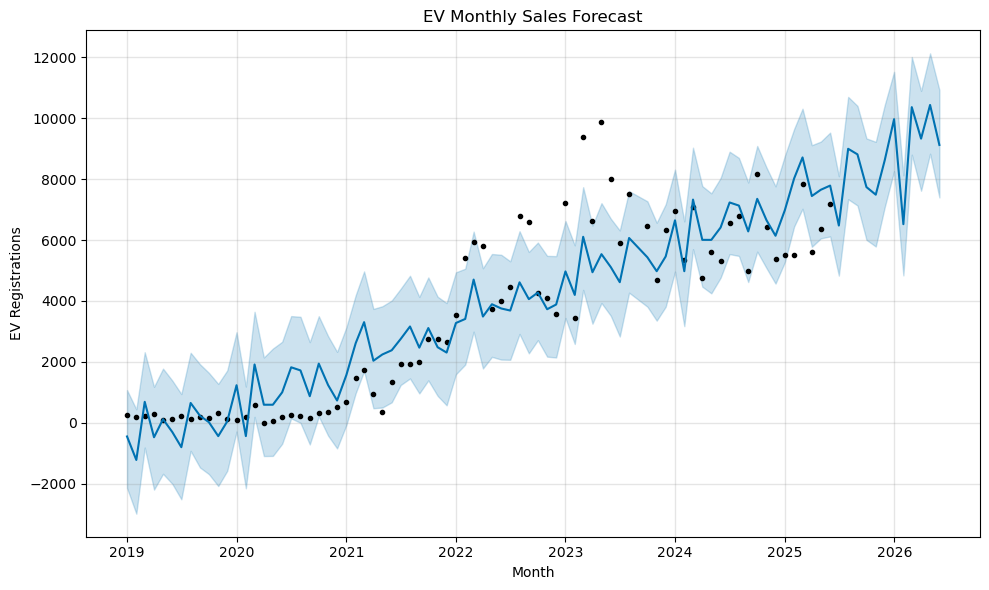

,ds,yhat,yhat_lower,yhat_upper
77,2025-06-30,6475.663059,4830.085647,8093.589585
78,2025-07-31,8994.946460,7339.564539,10698.879400
79,2025-08-31,8812.389742,7133.085325,10403.957833
80,2025-09-30,7737.432272,6005.323546,9336.052237
81,2025-10-31,7488.288017,5786.549904,9223.184560
82,2025-11-30,8622.368449,7084.715964,10436.451645
83,2025-12-31,9966.987452,8257.521495,11522.833293
84,2026-01-31,6519.486101,4838.082142,8123.259764
85,2026-02-28,10362.584923,8801.743920,12008.294337
86,2026-03-31,9328.199867,7617.460133,10895.202760


In [16]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

df = pd.read_excel("EV.xlsx")


month_map = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4,
    'May': 5, 'June': 6, 'July': 7, 'August': 8,
    'September': 9, 'October': 10, 'November': 11, 'December': 12
}
df['Month_Num'] = df['Month'].map(month_map)

df['year'] = df['Year']
df['month'] = df['Month_Num']
df['day'] = 1
df['date'] = pd.to_datetime(df[['year', 'month', 'day']])

monthly_sales = df.groupby('date').size().reset_index(name='y')
monthly_sales = monthly_sales.rename(columns={'date': 'ds'})  # Prophet expects ds (date) and y (value)

model = Prophet()
model.fit(monthly_sales)
future = model.make_future_dataframe(periods=12, freq='M')

forecast = model.predict(future)

model.plot(forecast)
plt.title("EV Monthly Sales Forecast")
plt.xlabel("Month")
plt.ylabel("EV Registrations")
plt.tight_layout()
plt.show()

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(12)


22:26:27 - cmdstanpy - INFO - Chain [1] start processing
22:26:27 - cmdstanpy - INFO - Chain [1] done processing


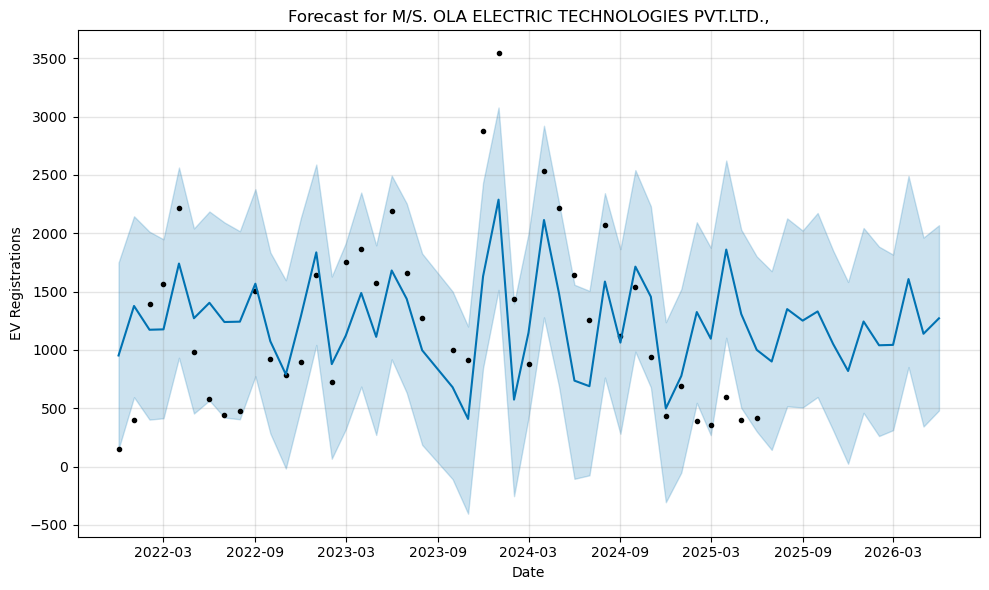

22:26:28 - cmdstanpy - INFO - Chain [1] start processing



🔮 Forecast for M/S. OLA ELECTRIC TECHNOLOGIES PVT.LTD.,:

           ds         yhat
42 2025-07-01   900.366110
43 2025-08-01  1349.570330
44 2025-09-01  1250.820106
45 2025-10-01  1329.605888
46 2025-11-01  1050.716850
47 2025-12-01   819.003671
48 2026-01-01  1243.535634
49 2026-02-01  1039.599267
50 2026-03-01  1042.887467
51 2026-04-01  1607.035023
52 2026-05-01  1138.239683
53 2026-06-01  1270.723488


22:26:28 - cmdstanpy - INFO - Chain [1] done processing


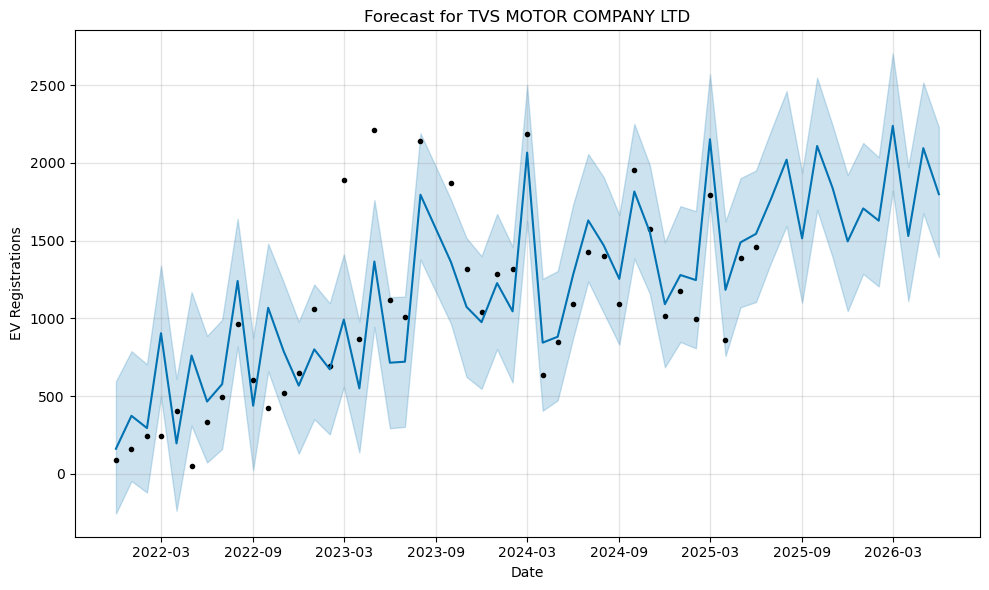

22:26:28 - cmdstanpy - INFO - Chain [1] start processing



🔮 Forecast for TVS MOTOR COMPANY LTD:

           ds         yhat
42 2025-07-01  1768.300584
43 2025-08-01  2020.159897
44 2025-09-01  1513.885030
45 2025-10-01  2108.192134
46 2025-11-01  1836.516015
47 2025-12-01  1494.622638
48 2026-01-01  1706.566503
49 2026-02-01  1627.757632
50 2026-03-01  2237.734564
51 2026-04-01  1529.293062
52 2026-05-01  2094.097482
53 2026-06-01  1798.304136


22:26:28 - cmdstanpy - INFO - Chain [1] done processing


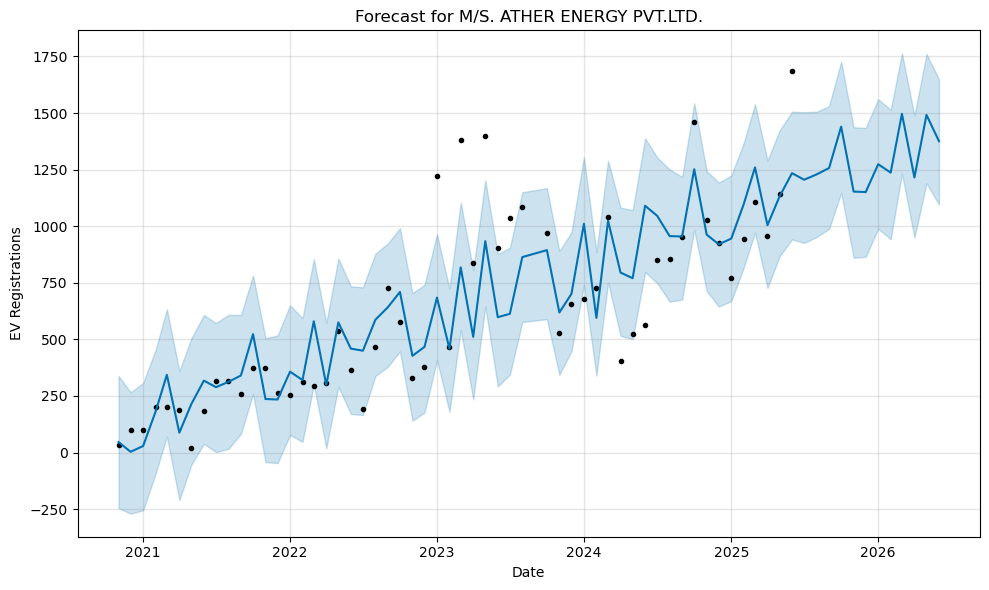

22:26:29 - cmdstanpy - INFO - Chain [1] start processing



🔮 Forecast for M/S. ATHER ENERGY PVT.LTD.:

           ds         yhat
55 2025-07-01  1205.242669
56 2025-08-01  1228.672441
57 2025-09-01  1256.867439
58 2025-10-01  1439.661206
59 2025-11-01  1152.915576
60 2025-12-01  1150.745881
61 2026-01-01  1273.712411
62 2026-02-01  1236.664729
63 2026-03-01  1496.584753
64 2026-04-01  1215.144300
65 2026-05-01  1491.668434
66 2026-06-01  1375.567614


22:26:29 - cmdstanpy - INFO - Chain [1] done processing


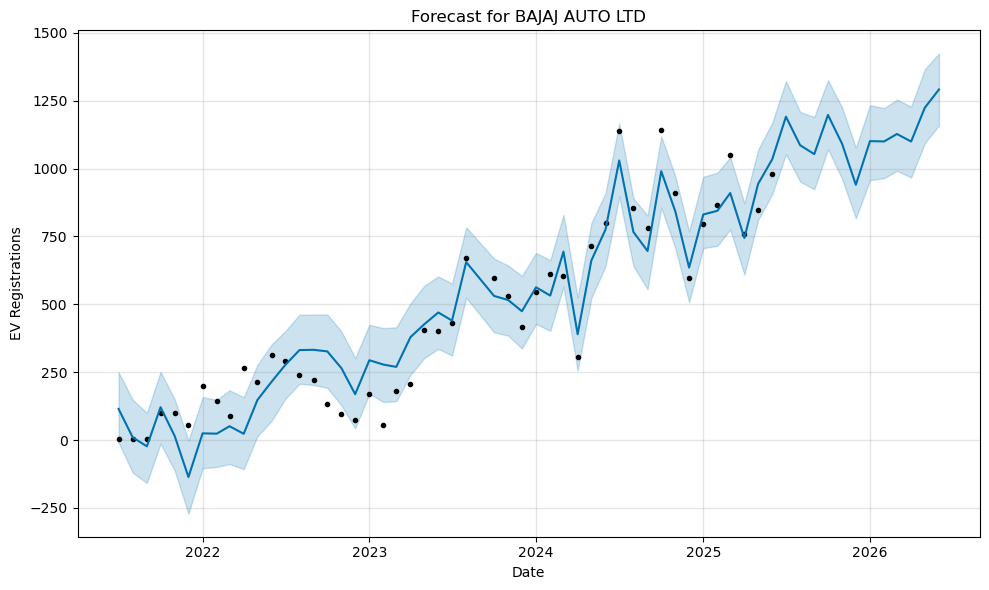

22:26:29 - cmdstanpy - INFO - Chain [1] start processing



🔮 Forecast for BAJAJ AUTO LTD:

           ds         yhat
47 2025-07-01  1191.446675
48 2025-08-01  1086.377722
49 2025-09-01  1053.496208
50 2025-10-01  1197.819086
51 2025-11-01  1091.142864
52 2025-12-01   940.608857
53 2026-01-01  1101.500485
54 2026-02-01  1100.278890
55 2026-03-01  1127.712965
56 2026-04-01  1099.944084
57 2026-05-01  1224.479027
58 2026-06-01  1291.798511


22:26:29 - cmdstanpy - INFO - Chain [1] done processing


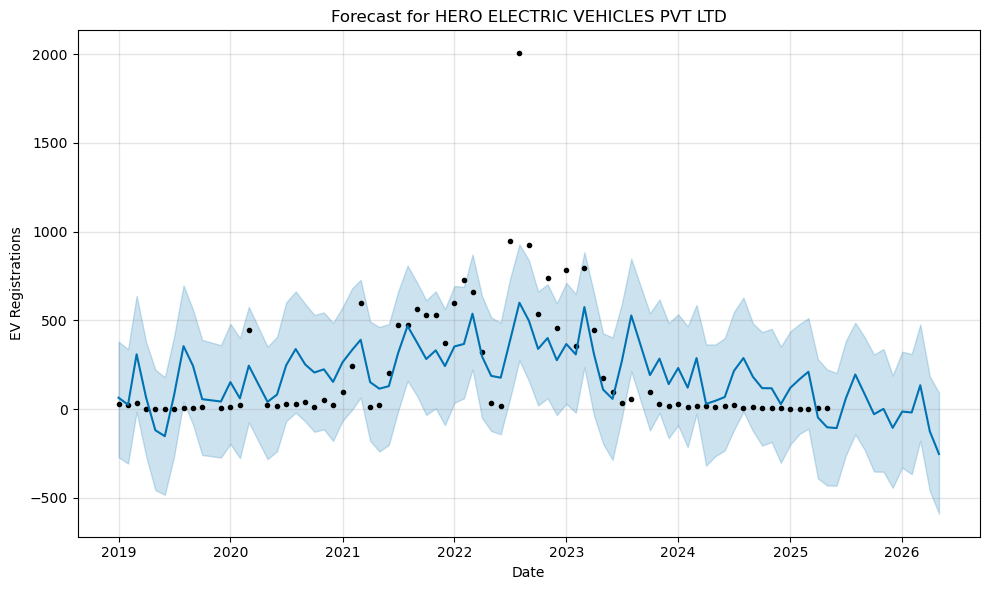

22:26:30 - cmdstanpy - INFO - Chain [1] start processing



🔮 Forecast for HERO ELECTRIC VEHICLES PVT LTD:

           ds        yhat
74 2025-06-01 -107.444809
75 2025-07-01   59.622730
76 2025-08-01  194.531105
77 2025-09-01   81.976245
78 2025-10-01  -29.115256
79 2025-11-01    0.936068
80 2025-12-01 -106.043109
81 2026-01-01  -14.396329
82 2026-02-01  -19.411656
83 2026-03-01  134.140723
84 2026-04-01 -125.387074
85 2026-05-01 -253.429109


22:26:30 - cmdstanpy - INFO - Chain [1] done processing


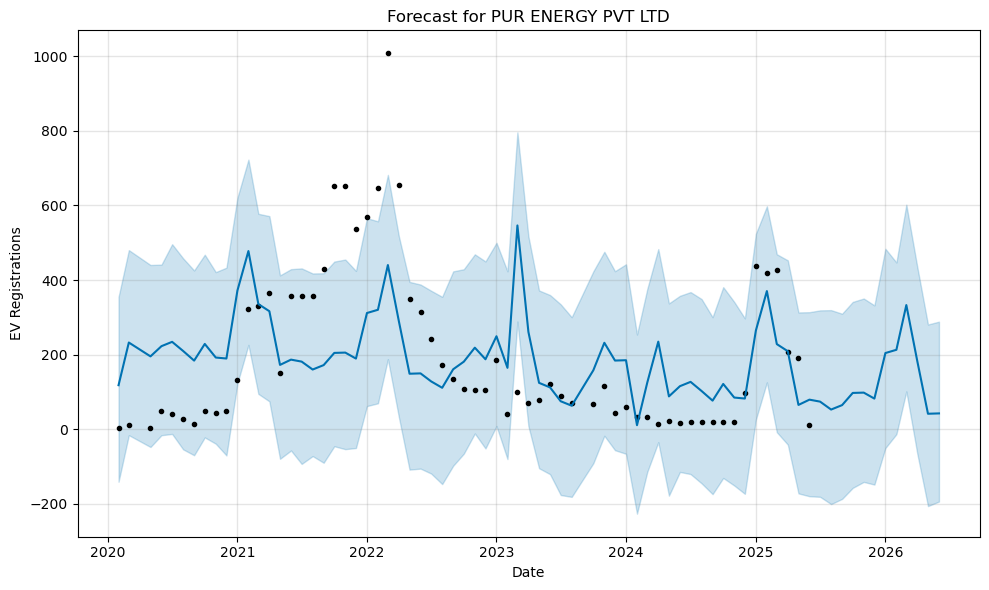

22:26:30 - cmdstanpy - INFO - Chain [1] start processing



🔮 Forecast for PUR ENERGY PVT LTD:

           ds        yhat
63 2025-07-01   73.879833
64 2025-08-01   52.640441
65 2025-09-01   64.529310
66 2025-10-01   97.227019
67 2025-11-01   98.062232
68 2025-12-01   81.992856
69 2026-01-01  204.195472
70 2026-02-01  212.914336
71 2026-03-01  332.907622
72 2026-04-01  181.995078
73 2026-05-01   41.378518
74 2026-06-01   42.305610


22:26:30 - cmdstanpy - INFO - Chain [1] done processing


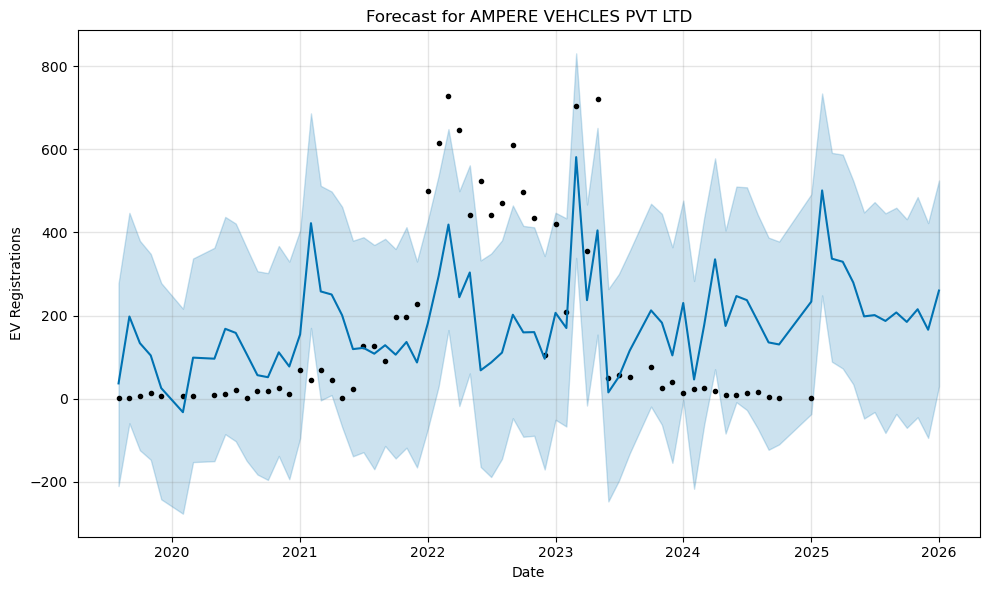

22:26:31 - cmdstanpy - INFO - Chain [1] start processing



🔮 Forecast for AMPERE VEHCLES PVT LTD:

           ds        yhat
61 2025-02-01  500.816039
62 2025-03-01  336.701073
63 2025-04-01  329.343035
64 2025-05-01  279.438720
65 2025-06-01  198.035998
66 2025-07-01  201.056873
67 2025-08-01  187.022102
68 2025-09-01  207.401846
69 2025-10-01  184.702225
70 2025-11-01  215.167503
71 2025-12-01  165.904455
72 2026-01-01  260.099885


22:26:31 - cmdstanpy - INFO - Chain [1] done processing


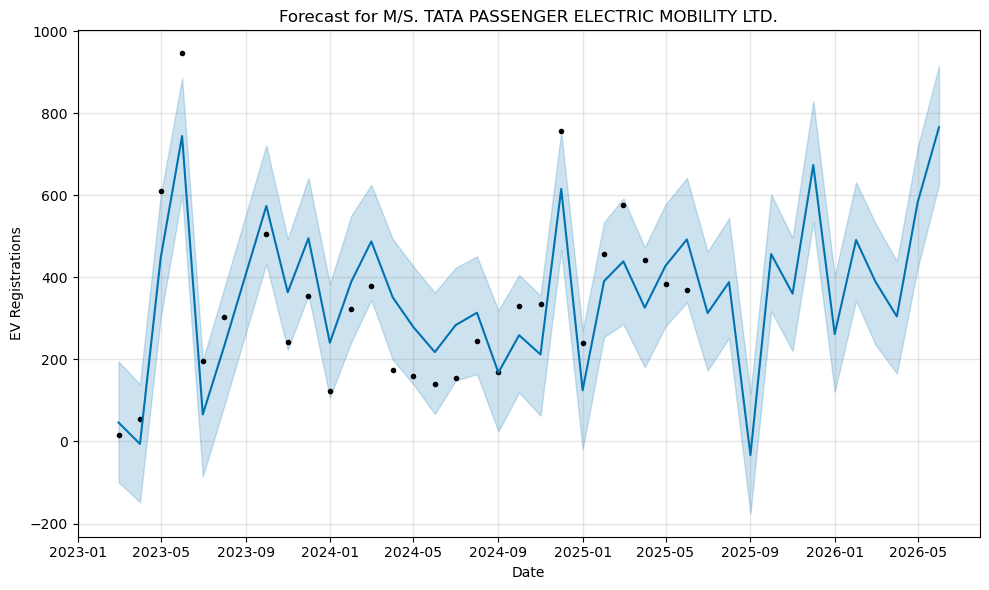

22:26:31 - cmdstanpy - INFO - Chain [1] start processing



🔮 Forecast for M/S. TATA PASSENGER ELECTRIC MOBILITY LTD.:

           ds        yhat
27 2025-07-01  313.007478
28 2025-08-01  388.301823
29 2025-09-01  -33.102128
30 2025-10-01  456.816647
31 2025-11-01  360.372302
32 2025-12-01  673.873805
33 2026-01-01  261.905987
34 2026-02-01  491.120639
35 2026-03-01  389.501432
36 2026-04-01  304.681939
37 2026-05-01  582.053637
38 2026-06-01  765.809440


22:26:31 - cmdstanpy - INFO - Chain [1] done processing


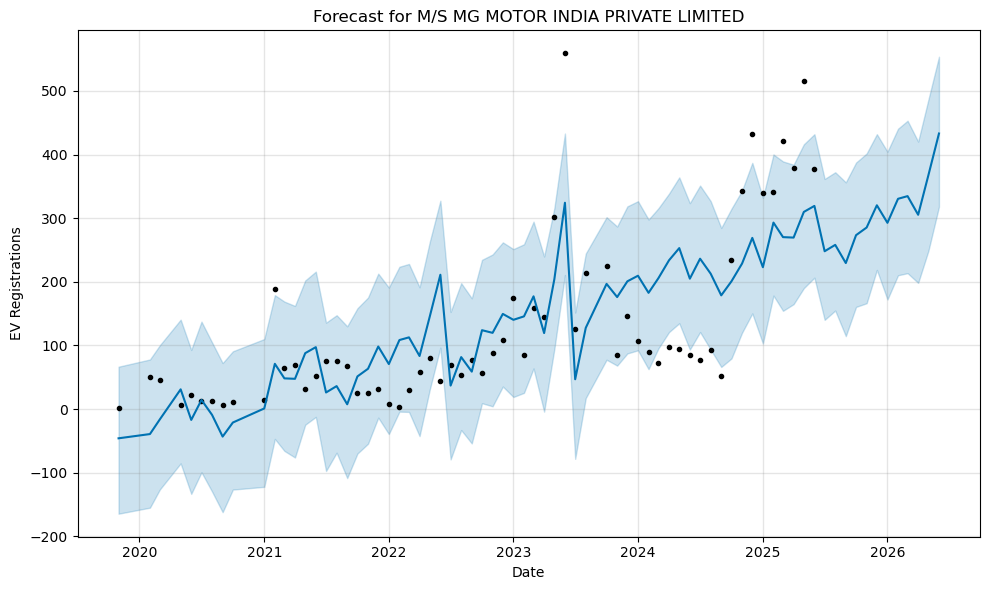

22:26:32 - cmdstanpy - INFO - Chain [1] start processing



🔮 Forecast for M/S MG MOTOR INDIA PRIVATE LIMITED:

           ds        yhat
62 2025-07-01  248.026721
63 2025-08-01  258.018444
64 2025-09-01  229.465272
65 2025-10-01  273.264773
66 2025-11-01  285.295683
67 2025-12-01  320.230994
68 2026-01-01  292.681478
69 2026-02-01  330.416014
70 2026-03-01  334.635485
71 2026-04-01  305.320643
72 2026-05-01  367.512658
73 2026-06-01  433.042052


22:26:32 - cmdstanpy - INFO - Chain [1] done processing


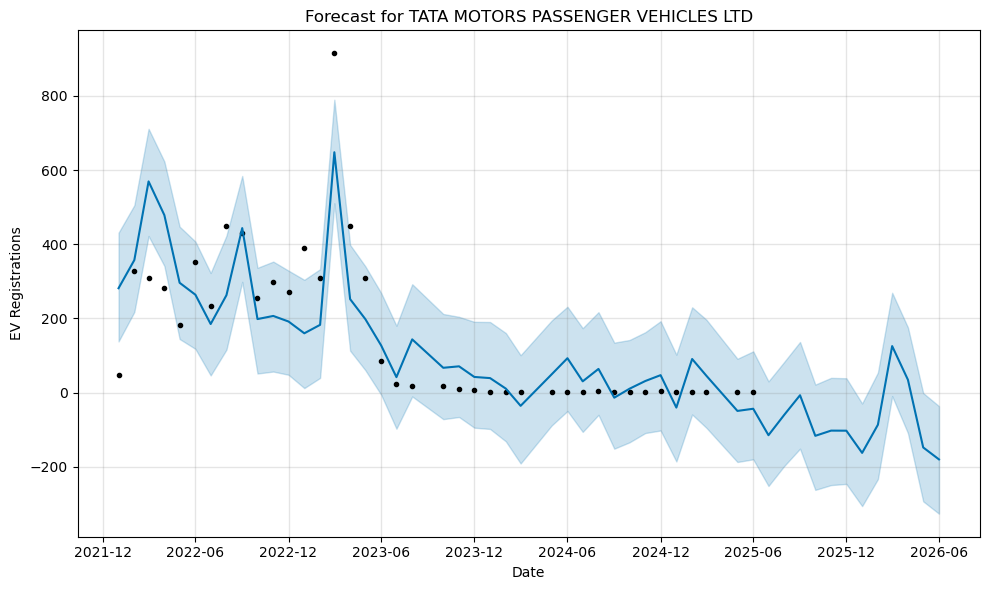


🔮 Forecast for TATA MOTORS PASSENGER VEHICLES LTD:

           ds        yhat
39 2025-07-01 -115.124986
40 2025-08-01  -60.171595
41 2025-09-01   -7.322201
42 2025-10-01 -116.825648
43 2025-11-01 -102.788184
44 2025-12-01 -102.988245
45 2026-01-01 -162.868162
46 2026-02-01  -86.939421
47 2026-03-01  125.267098
48 2026-04-01   34.364574
49 2026-05-01 -148.180290
50 2026-06-01 -180.428827


In [25]:
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt

# Ensure date is datetime
df['date'] = pd.to_datetime(df['date'])

# Group by makerName and month start, count registrations
grouped = (
    df.groupby(['makerName', pd.Grouper(key='date', freq='MS')])
    .size()  # counts rows (registrations)
    .reset_index(name='y')  # y is the target variable
    .rename(columns={'date': 'ds'})  # Prophet needs 'ds' and 'y'
)

# Top 10 brands by total registrations
top_brands = (
    grouped.groupby('makerName')['y']
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .index
    .tolist()
)

brand_forecasts = {}

for brand in top_brands:
    brand_data = grouped[grouped['makerName'] == brand][['ds', 'y']].copy()

    if len(brand_data) < 24:
        print(f"Skipping {brand} due to insufficient data.")
        continue

    model = Prophet()
    model.fit(brand_data)

    future = model.make_future_dataframe(periods=12, freq='MS')  # 12-month forecast
    forecast = model.predict(future)

    brand_forecasts[brand] = forecast

    # Plot forecast
    fig = model.plot(forecast)
    plt.title(f"Forecast for {brand}")
    plt.xlabel("Date")
    plt.ylabel("EV Registrations")
    plt.tight_layout()
    plt.show()

    print(f"\n🔮 Forecast for {brand}:\n")
    print(forecast[['ds', 'yhat']].tail(12))
